In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from os.path import exists

from processExperimentalData import processData

In [3]:
pathToPickledData = r"./data/experimentalData.pkl"
if not exists(pathToPickledData): processData()
with open(pathToPickledData,'rb') as f: fullData = pickle.load(f)

In [6]:
def plotThisVariable(keyword,dataframe):
    with plt.xkcd(scale=0.1, length=50, randomness=0.1):
        fig,ax = plt.subplots(figsize=[8,3],tight_layout=True)
        for data in dataframe:
            if keyword in data:
                ax.plot(dataframe['Time']/3600,dataframe[data],label=data)
        ax.legend(loc="center left",bbox_to_anchor=(1,0.5))
        ax.set_xlabel("Time [h]")
        ax.set_ylabel(keyword)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.show()

## Table 1 - Continous readings

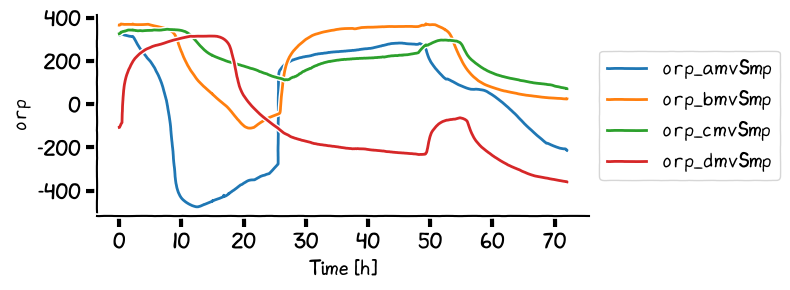

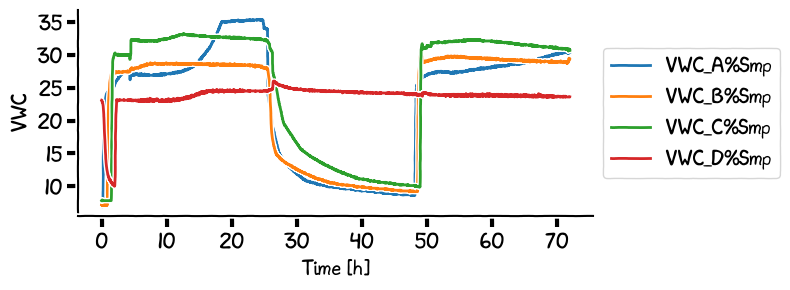

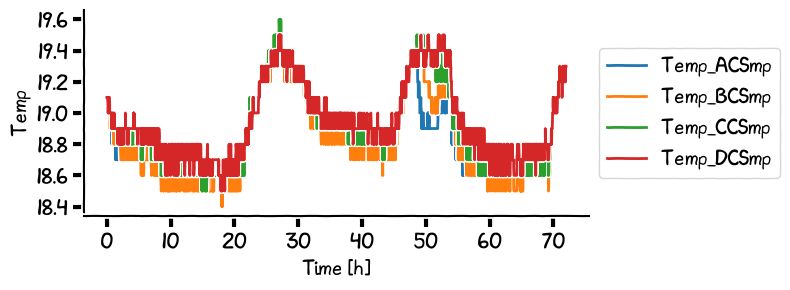

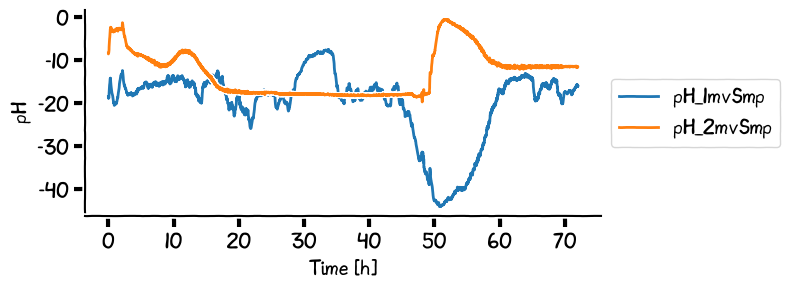

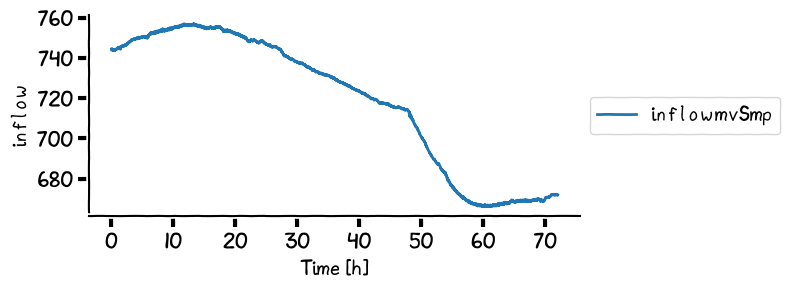

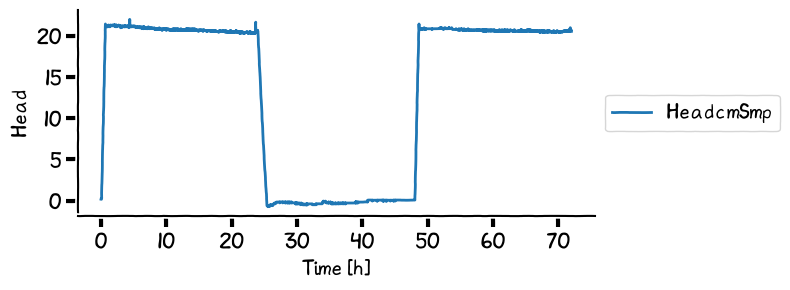

In [7]:
for key in ['orp','VWC','Temp','pH','inflow','Head']:
    plotThisVariable(key,fullData['Table1'])

## Table 2 - Sampled data

In [9]:
def plotTheseSampledVariables(keywords,dataframe):
    with plt.xkcd(scale=0.1, length=50, randomness=1):
        fig,axs = plt.subplots(len(keywords),sharex=True,figsize=[8,8])
        for ax,keyword in zip(axs,keywords):
            for place in sorted(set(dataframe['Place'])):
                filtData = dataframe[dataframe['Place'] == place]
                ax.plot(filtData['Time (hr)'],filtData[keyword],marker='X',label=place)
            ax.set_ylabel(keyword)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
        ax.set_xlabel("Time [h]")
        axs[1].legend(loc="center left",bbox_to_anchor=(1,0))
    plt.show()

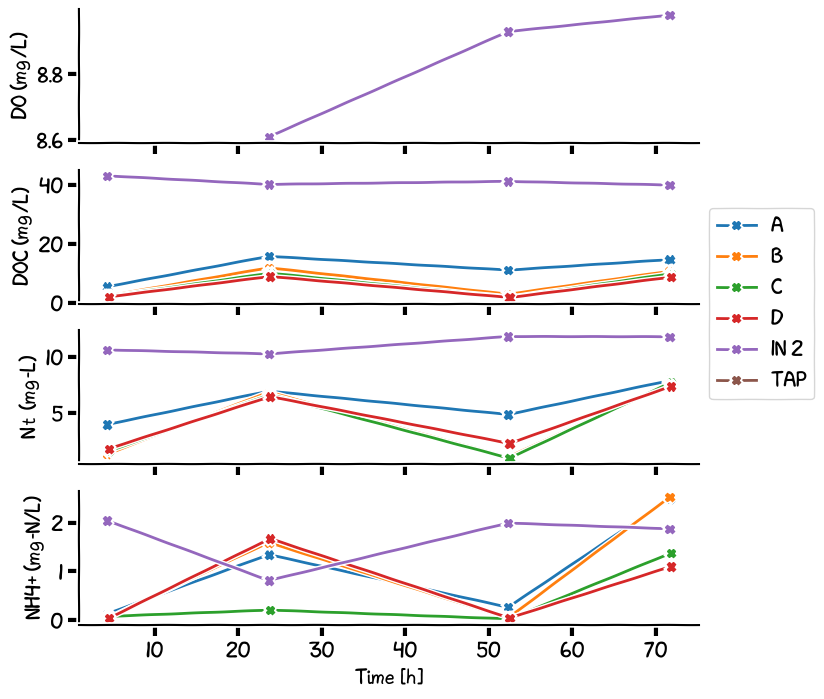

In [10]:
chems = ['DO (mg/L)', 'DOC (mg/L)', 'Nt (mg-L)','NH4+ (mg-N/L)']
plotTheseSampledVariables(chems,fullData['Samples'])

## Dissolved oxygen

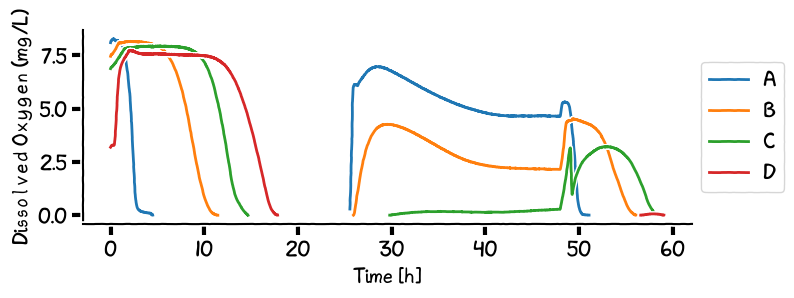

In [12]:
dataDissOxygen = fullData['Oxygen']

with plt.xkcd(scale=0.1, length=50, randomness=0):
    fig,ax = plt.subplots(figsize=[8,3],tight_layout=True)
    for k,data in dataDissOxygen.items():
        ax.plot(data['Time']/3600,data['DO (mg/L)'],label=k)
    ax.legend(loc="center left",bbox_to_anchor=(1,0.5))
    ax.set_xlabel("Time [h]")
    ax.set_ylabel("Dissolved Oxygen (mg/L)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()
    